In [1]:
%run ../graphics/plot-settings.py

In [2]:
import pickle
  
with open('../data/small-gas-results.pickle', 'rb') as file:
    stored = pickle.load(file)
    
df       = stored['df']
T        = stored['T']
energies = stored['energies']
N        = 50

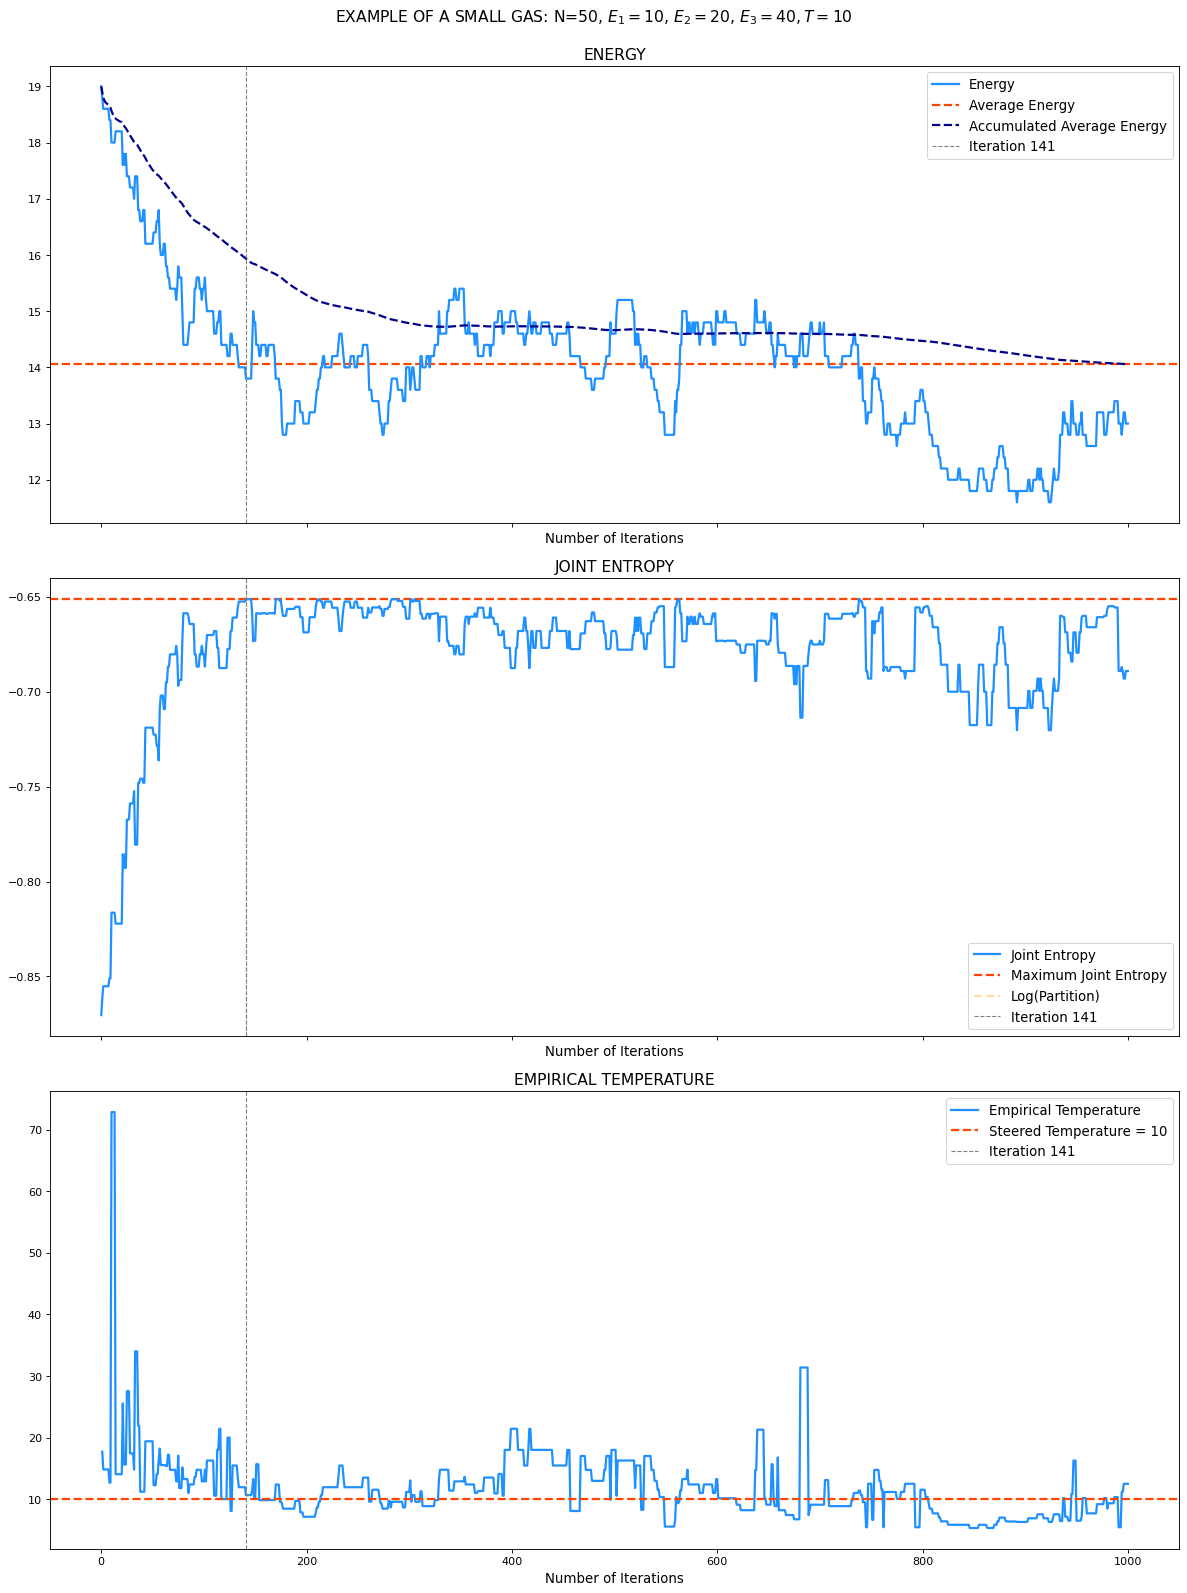

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
data1 = df['energy']
# data2 = np.cumsum(df['dS_joint'])
data2 = df['entropy']-df['energy']/T

filter = ~np.isnan(df['temperature'])
data3 = df['temperature']#[filter]
logpartition = np.log(sum(np.exp(-energy/T) for energy in energies.values()))
idxmax = data2.idxmax()

# TEXT LABELS
# title   = 'ENERGY, JOINT ENTROPY and TEMPERATURE as function of number of iterations'
title   = "EXAMPLE OF A SMALL GAS: N=50, $E_1=10$, $E_2=20$, $E_3=40, T=10$"
xlabel  = 'Number of Iterations'
ylabel1 = 'Energy'
ylabel2 = 'Accumulated Average Energy'
ylabel3 = 'Average Energy'
ylabel4 = 'Joint Entropy'
ylabel5 = 'Maximum Joint Entropy'
ylabel6 = 'Log(Partition)'
ylabel7 = 'Empirical Temperature'
ylabel8 = 'Iteration {}'.format(idxmax)

# SUBPLOTS
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,figsize=(15, 20), dpi=80)

# FIRST SUBPLOT
l1, = ax1.plot(data1,color=color2,linewidth=2,label=ylabel1)
l3  = ax1.axhline(y=np.mean(data1),xmin=0,xmax=3,c=color7,linewidth=2,zorder=0,linestyle='dashed',label=ylabel3)
l2, = ax1.plot(data1.expanding().mean(), color=color1,linewidth=2,linestyle='dashed',label=ylabel2)
ax1.axvline(x=idxmax, color=color5, linewidth=1.0, linestyle = 'dashed',label=ylabel8)
ax1.set_xlabel(xlabel)
ax1.set_title(ylabel1.upper())
ax1.legend()

# SECOND SUBPLOT
l4, = ax2.plot(data2,color=color2,linewidth=2,label=ylabel4)
l5  = ax2.axhline(y=np.max(data2),xmin=0,xmax=3,c=color7,linewidth=2,zorder=1,linestyle='dashed',label=ylabel5)
l6  = ax2.axhline(y=logpartition,xmin=0,xmax=3,c=color4,linewidth=2,zorder=0,linestyle='dashed',label=ylabel6)
ax2.axvline(x=idxmax, color=color5, linewidth=1.0, linestyle = 'dashed',label=ylabel8)
ax2.axvline(x=idxmax, color=color5, linewidth=1.0, linestyle = 'dashed')
ax2.set_xlabel(xlabel)
ax2.set_title(ylabel4.upper())
# ax2.legend([l4, l5, l6],[ylabel4, ylabel5, ylabel6])
ax2.legend()

# THIRD SUBPLOT
l7, = ax3.plot(data3, color=color2,linewidth=2.0,label=ylabel7)
l8  = ax3.axhline(y = T, color=color7, linewidth=2.0, linestyle = 'dashed',label='Steered Temperature = 10')
# ax3.axvline(x=idxmax, color=color5, linewidth=1.0, linestyle = 'dashed')
ax3.axvline(x=idxmax, color=color5, linewidth=1.0, linestyle = 'dashed',label=ylabel8)
ax3.set_title(ylabel7.upper())
# ax3.legend([l7, l8],[ylabel7, 'Steered Temperature = 10'])#,framealpha=0.0)
ax3.legend()

fig.suptitle(title,y=0.995)
ax3.set_xlabel(xlabel)
fig.tight_layout() 

plt.savefig('../output/03-small-gas-cooling-down.png',transparent=True)